In [1]:
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data = load_digits()
digits_data.images.shape

(1797, 8, 8)

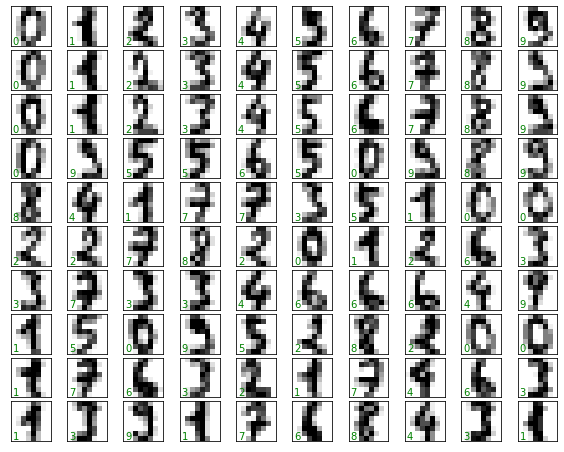

In [3]:
fig, axes = plt.subplots(10, 10, figsize= (10, 8),
                      subplot_kw = {'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits_data.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits_data.target[i]),
           transform = ax.transAxes, color = 'green')

In [4]:
iso = Isomap(n_components = 2)
iso.fit(digits_data.data)
data_projected = iso.transform(digits_data.data)
data_projected.shape

(1797, 2)

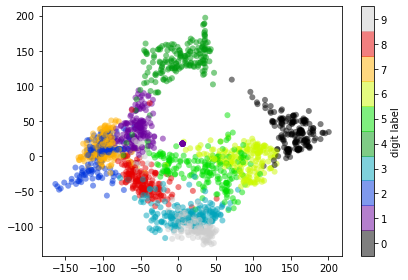

In [5]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits_data.target,
           edgecolors='none', alpha=0.5,
           cmap = plt.get_cmap('nipy_spectral', 10))
plt.colorbar(label = "digit label", ticks = range(10))
plt.clim(-0.5, 9.5)
plt.tight_layout()
plt.show()

## Classifications Of Digits

In [6]:
X = digits_data.data
y = digits_data.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
model = GaussianNB()

In [9]:
model.fit(x_train, y_train)

GaussianNB()

In [10]:
y_model = model.predict(x_test)

In [11]:
accuracy_score(y_test, y_model)

0.8333333333333334

Text(130.55999999999997, 0.5, 'True Value')

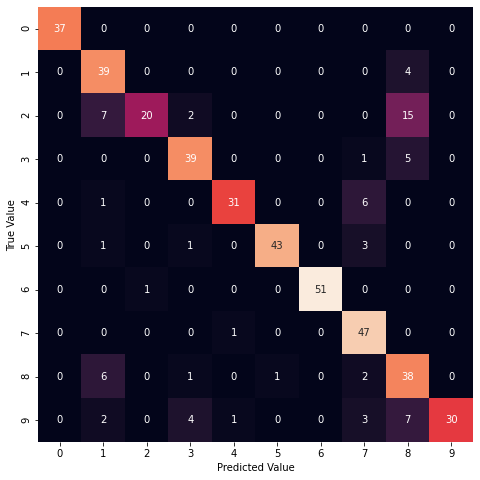

In [12]:
matrix = confusion_matrix(y_test, y_model)

plt.figure(figsize = (10, 8))
sns.heatmap(matrix, square = True, annot = True, cbar = False)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

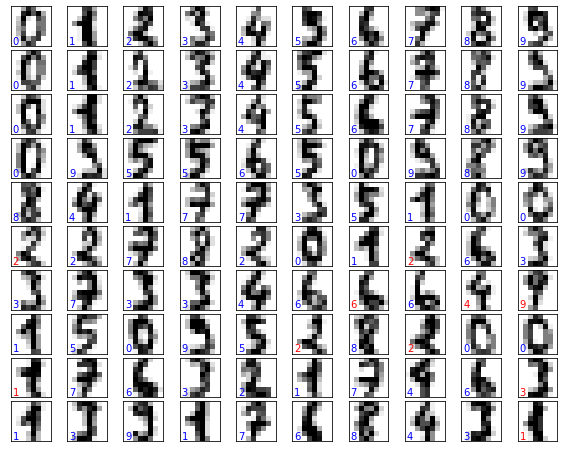

In [13]:
fig, axes = plt.subplots(10, 10, figsize= (10, 8),
                      subplot_kw = {'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits_data.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits_data.target[i]),
           transform = ax.transAxes, color = 'blue' if (y_test[i] == y_model[i]) else 'red')